In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('default')

In [2]:
free_data = np.load('../dataset/image/syn1_free_0.npy')
damp_data = np.load('../dataset/label/syn1_damp_0.npy')

In [3]:
nx = free_data.shape[0]
dx = 4

nt = free_data.shape[1]
dt = 0.004

patch_size = 256
overlap = 1

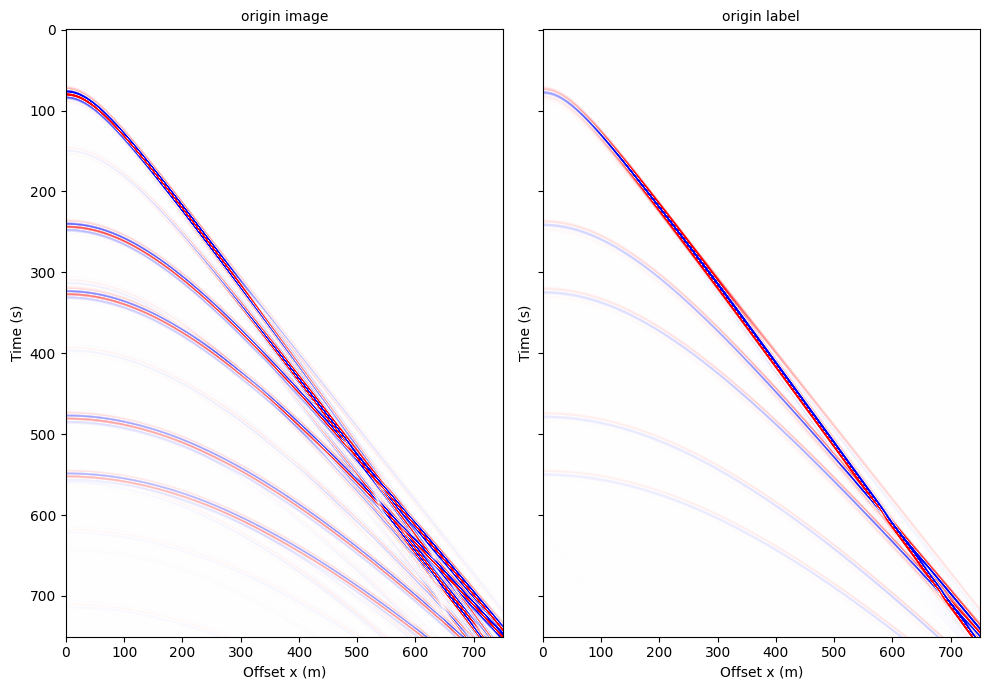

In [4]:
vmax = 5e0
vmin = -vmax

fig, axs = plt.subplots(1, 2, figsize=(10, 7),sharey=True)

axs[0].imshow(free_data.T, aspect='auto', vmin=vmin, vmax=vmax,cmap='bwr_r')
axs[0].set_title('origin image',fontsize=10)
axs[0].set_xlabel('Offset x (m)',fontsize=10)
axs[0].set_ylabel('Time (s)',fontsize=10)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)

axs[1].imshow(damp_data.T, aspect='auto', vmin=vmin, vmax=vmax,cmap='bwr_r')
axs[1].set_title('origin label',fontsize=10)
axs[1].set_xlabel('Offset x (m)',fontsize=10)
axs[1].set_ylabel('Time (s)',fontsize=10)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()

In [5]:
def extract_patches(data, patch_size, overlap=2):
    """Extract patches from 2D data with zero-padding at edges."""
    nr, nt = data.shape
    patches = []
    
    step = max(1, patch_size // overlap)  # Ensure step is at least 1
    
    # Iterate through all possible starting positions with step size
    for i in range(0, nr, step):
        for j in range(0, nt, step):
            # Calculate the end indices for the current patch
            i_end = i + patch_size
            j_end = j + patch_size
            
            # Create a zero-initialized patch
            patch = np.zeros((patch_size, patch_size), dtype=data.dtype)
            
            # Determine the valid data region to copy
            data_i_start = max(i, 0)
            data_i_end = min(i_end, nr)
            data_j_start = max(j, 0)
            data_j_end = min(j_end, nt)
            
            # Calculate the corresponding region in the patch
            patch_i_start = data_i_start - i
            patch_i_end = patch_i_start + (data_i_end - data_i_start)
            patch_j_start = data_j_start - j
            patch_j_end = patch_j_start + (data_j_end - data_j_start)
            
            # Copy valid data to the patch
            if data_i_start < nr and data_j_start < nt:
                patch[patch_i_start:patch_i_end, patch_j_start:patch_j_end] = \
                    data[data_i_start:data_i_end, data_j_start:data_j_end]
            
            patches.append(patch)
    
    return patches

In [6]:
image_patches = extract_patches(free_data, patch_size, overlap)
label_patches = extract_patches(damp_data, patch_size, overlap)
len(image_patches)

9

In [7]:
def plot_patches_on_image(ax, data, patch_size, dx, dt, overlap=2):
    nr, nt = data.shape
    step = patch_size // overlap  # 计算步长，确保窗口重叠覆盖
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']  # 颜色循环
    
    patch_idx = 0
    
    for i in range(0, nr, step):
        for j in range(0, nt, step):
            # Calculate the end indices for the current patch
            i_end = i + patch_size
            j_end = j + patch_size
            
            # Create a zero-initialized patch
            patch = np.zeros((patch_size, patch_size), dtype=data.dtype)
            
            # Determine the valid data region to copy
            data_i_start = max(i, 0)
            data_i_end = min(i_end, nr)
            data_j_start = max(j, 0)
            data_j_end = min(j_end, nt)
            
            # Calculate the corresponding region in the patch
            patch_i_start = data_i_start - i
            patch_i_end = patch_i_start + (data_i_end - data_i_start)
            patch_j_start = data_j_start - j
            patch_j_end = patch_j_start + (data_j_end - data_j_start)
            
            color = colors[patch_idx % len(colors)]
            rect = patches.Rectangle((i, j), patch_size, patch_size,
                                    linewidth=1.5, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
            
            ax.text((i + patch_size // 2), (j + patch_size // 2), str(patch_idx + 1),
                color='black', fontsize=8, ha='center', va='center', weight='bold', 
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
            patch_idx += 1
            
            # Copy valid data to the patch
            if data_i_start < nr and data_j_start < nt:
                patch[patch_i_start:patch_i_end, patch_j_start:patch_j_end] = \
                    data[data_i_start:data_i_end, data_j_start:data_j_end]
        

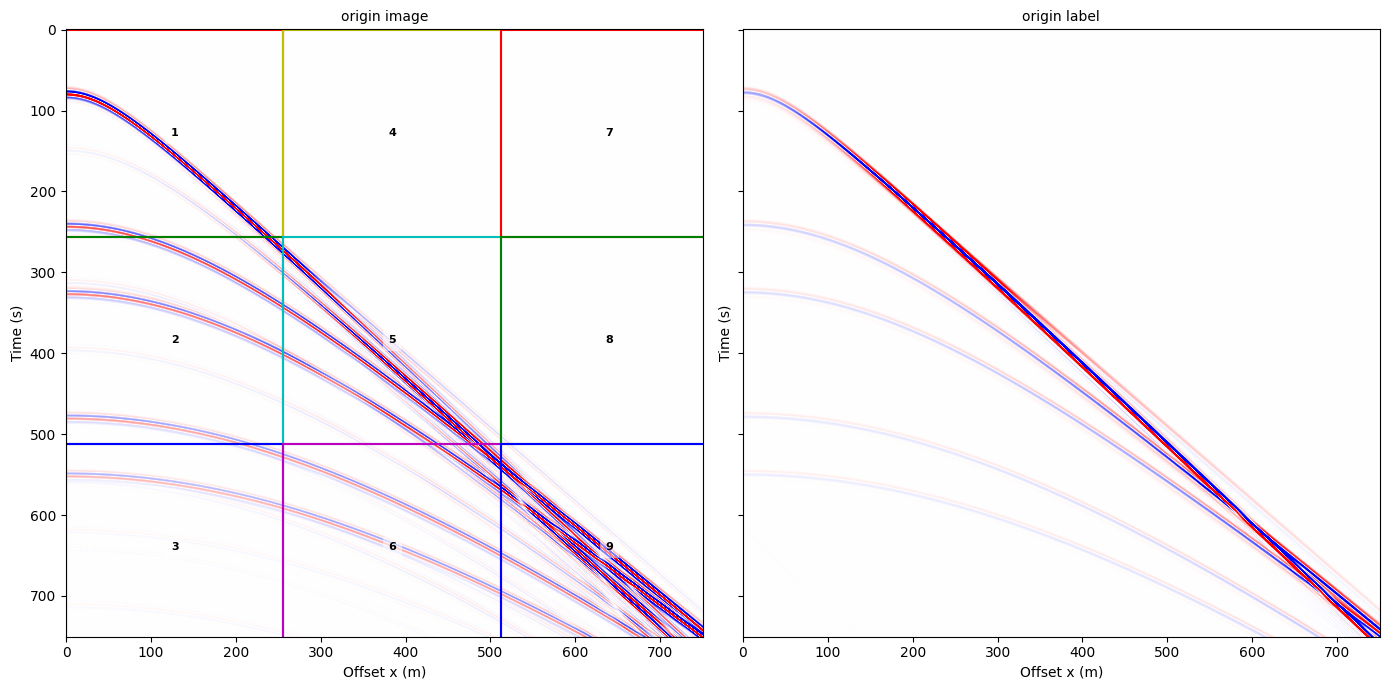

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7),sharey=True)

axs[0].imshow(free_data.T, aspect='auto', vmin=vmin, vmax=vmax,cmap='bwr_r')
axs[0].set_title('origin image',fontsize=10)
axs[0].set_xlabel('Offset x (m)',fontsize=10)
axs[0].set_ylabel('Time (s)',fontsize=10)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
plot_patches_on_image(axs[0], free_data, patch_size, dx, dt, overlap)

axs[1].imshow(damp_data.T, aspect='auto', vmin=vmin, vmax=vmax,cmap='bwr_r')
axs[1].set_title('origin label',fontsize=10)
axs[1].set_xlabel('Offset x (m)',fontsize=10)
axs[1].set_ylabel('Time (s)',fontsize=10)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()